In [1]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest','name','ticket','cabin','embarked','fare'], axis=1, inplace=True)
X['sex'] = X['sex'].map({'male':1,'female':0})

# 将所有类别列转换为数值类型
for col in X.select_dtypes(['category']).columns:
    X[col] = X[col].astype('int')

# 只对数值列进行填充
X = X.apply(lambda col: col.fillna(col.median()) if np.issubdtype(col.dtype, np.number) else col)
y = y.astype(int)
X_mod = X.copy()

In [3]:
X_mod = X.copy()
howell = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv',sep=';')
howell
#https://tspace.library.utoronto.ca/handle/1807/10395

height1 = []
weight1 = []
for i,row in X.iterrows():
    age = row['age']
    sex = row['sex']
    how = howell[howell['male'] == sex]
    how['dist'] = np.abs(how['age']-age)
    how = how.sort_values('dist').head(10).sample(1)
    height = how['height']+ np.random.normal(0,1)
    weight = how['height']+np.random.normal(0,1)
    height1.append(height.values[0])
    weight1.append(weight.values[0])
    
X_mod['height'] = height1
X_mod['weight'] = weight1

/var/folders/0q/rdq3_nqd2rbdxv_9m7j7jhw80000gn/T/ipykernel_49367/2977094120.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  how['dist'] = np.abs(how['age']-age)
/var/folders/0q/rdq3_nqd2rbdxv_9m7j7jhw80000gn/T/ipykernel_49367/2977094120.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  how['dist'] = np.abs(how['age']-age)
/var/folders/0q/rdq3_nqd2rbdxv_9m7j7jhw80000gn/T/ipykernel_49367/2977094120.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [4]:
femur = []
tibia = []
humerus = []
radius = []
hair_length = []
hair_diameter = []
shoe_size = []


for i,row in X_mod.iterrows():
    if row['sex'] == 1:
        femur.append( (row['height']-81.306)/1.88 )
        tibia.append((row['height']-78.664)/2.376  )
        humerus.append((row['height']-98.341)/2.270)
        radius.append((row['height']-88.881)/3.449)
        hair_length.append(np.random.normal(2.35,1.29))
        hair_diameter.append(np.random.normal(31.29,5.75))
        shoe_size.append(np.random.normal(273,10))
        
    else:
        femur.append( (row['height']-72.84)/1.945 )
        tibia.append((row['height']-74.774)/2.352)
        humerus.append((row['height']-56.287)/3.448)
        radius.append((row['height']-68.238)/4.248)
        hair_length.append(np.random.normal(3,2.29))
        hair_diameter.append(np.random.normal(34.4,6.8))
        shoe_size.append(np.random.normal(243,12))

X_mod['femur'] = femur
X_mod['tibia'] = tibia
#X_mod['humerus'] = humerus
#X_mod['radius'] = radius

#X_mod['femur (L)'] = femur
#X_mod['tibia (L)'] = tibia
#X_mod['humerus (L)'] = humerus
#X_mod['radius (L)'] = radius
#X_mod['hair (l)'] = hair_length
#X_mod['hair (w)'] = hair_diameter
#X_mod['right foot length'] = shoe_size
#X_mod['left foot length'] = shoe_size#

<BarContainer object of 9 artists>

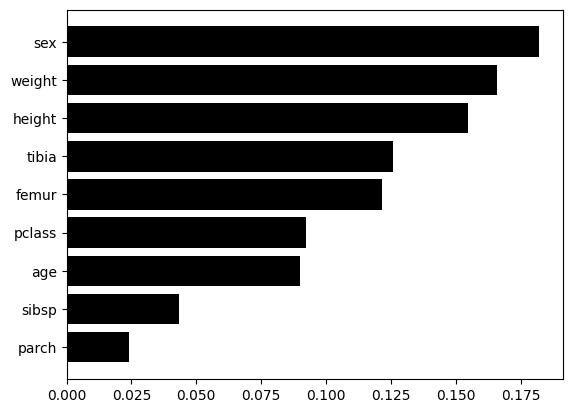

In [5]:
rf1 = RandomForestClassifier().fit(X_mod,y)
rf = RandomForestClassifier().fit(X,y)
imp1= pd.DataFrame(np.column_stack((X_mod.columns,rf1.feature_importances_)),columns = ['Feature','Importance Score'])
imp1 = imp1.sort_values('Importance Score',ascending = True)
plt.barh(imp1['Feature'], imp1['Importance Score'],color = 'black')


